# IT402 Soft Computing Lab

Submitted by: Harsh Agarwal (181IT117)

### Importing the libraries

In [1]:
from math import exp        
import pandas as pd
import numpy as np

### Setting the max no. of iterations and Threshold value

In [2]:
MAX_ITERS=50

### Reading the dataset

In [4]:
df=pd.read_csv('Heart_Dataset.csv', header=None)
class_values=np.unique(df[22])
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
77,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78,0,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1


### Shuffling the dataset tuples

In [5]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,1,0,1,1,1,...,0,1,0,1,0,0,1,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
76,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Normalizing the dataset values

In [6]:
class_label=df[22]
df=(df-df.mean())/df.std()
df=df.assign(target=class_label)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,target
0,0.99373,1.317816,2.255975,-0.592860,-0.516206,1.517948,2.629163,1.665654,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,2.068615,-0.535438,-0.554601,-0.689538,0
1,0.99373,-0.749346,-0.437726,1.665654,-0.516206,-0.650549,-0.375595,-0.592860,1.613508,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,1.432118,1
2,-0.99373,1.317816,2.255975,1.665654,-0.516206,1.517948,-0.375595,1.665654,1.613508,2.068615,...,1.987461,-0.282962,2.157628,-0.331243,-0.282962,2.068615,-0.535438,1.780560,-0.689538,0
3,0.99373,1.317816,-0.437726,-0.592860,1.912997,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0
4,-0.99373,-0.749346,-0.437726,-0.592860,1.912997,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.99373,1.317816,-0.437726,-0.592860,-0.516206,1.517948,-0.375595,1.665654,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,2.068615,-0.535438,-0.554601,-0.689538,0
76,0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,1.844285,-0.554601,-0.689538,0
77,-0.99373,1.317816,-0.437726,1.665654,-0.516206,-0.650549,-0.375595,-0.592860,1.613508,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,1.780560,-0.689538,0
78,-0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,1.432118,1


### Defining Class for Neuron and with functions to update bias and weights

In [7]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights=weights
        self.bias=bias
        
    def output(self, inputs):
        y=self.bias
        y+=sum(w*ip for w,ip in zip(self.weights, inputs))
        return 1/(1+exp(-y))
    
    def update(self, l_rate, error, outputs):
        # Update bias
        self.bias=self.bias+l_rate*error
        
        # Update weights
        for i in range(len(self.weights)):
            self.weights[i]=self.weights[i]+l_rate*error*outputs[i]

In [8]:
# Returns a neuron
def train_neuron(neuron, dataset):
    for t in range(MAX_ITERS):
        total_error=0
        for row in dataset:
            X=row[:-1]
            actual=row[-1]
            pred=neuron.output(inputs=X)
            error=pred*(1-pred)*(actual-pred)
            
            neuron.update(error=error, outputs=X, l_rate=1/(t+1))
            total_error+=error
        total_error/=len(dataset)
        if total_error-0<0.00005:
            break
    return neuron

### Performing 10 Fold Cross Validation

In [10]:
skip=len(df)//10
init=0

class_count=len(class_values)
conf_matrix = pd.DataFrame(np.zeros((class_count,class_count), dtype='int'), index = class_values, columns = class_values)\
.rename_axis('Predicted')\
.rename_axis('Actual', axis="columns").T

for _ in range(10):
    test=df[init:init+skip].to_numpy()
    train=df.drop(range(init,init+skip)).to_numpy()
    init+=skip
    neuron = Neuron(weights=[1/23 for _ in range(22)], bias=1)
    neuron = train_neuron(neuron=neuron, dataset=train)
    
    for row in test:
        X=row[:-1]
        actual=row[-1]
        pred=neuron.output(inputs=X)
        if pred<0.5:
            pred=0
        else: pred=1
        conf_matrix[pred][actual]+=1
df_confusion=conf_matrix
df_confusion

Predicted,0,1
Actual,,
0,42,12
1,13,13


In [13]:
total_tp=0
total_recall=0
total_precision=0
total_f1=0

for class_type in class_values:
    TP=df_confusion.loc[class_type][class_type]
    FN=sum(df_confusion.loc[class_type , : ])-TP
    FP=sum(df_confusion[class_type])-TP
    TN=df_confusion.values.sum()-(TP+FN+FP)
    
    precision=TP/(FP+TP)
    recall=TP/(TP+FN)
    f1=2*precision*recall/(precision+recall)

    total_recall+=recall
    total_precision+=precision
    total_f1+=f1
    total_tp+=TP

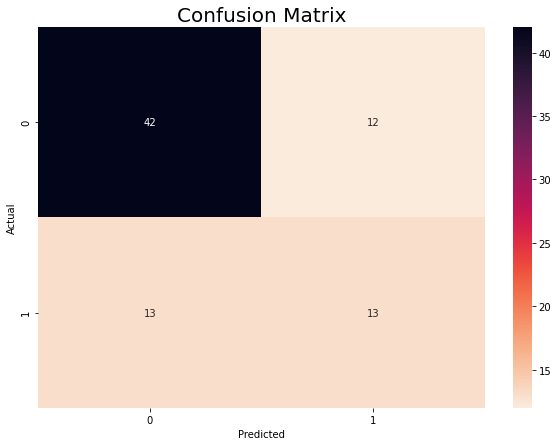

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True, cmap=sn.cm.rocket_r)
plt.show()

In [15]:
accuracy=100*total_tp/df_confusion.values.sum()
print("\nAvg Accuracy: {}%".format(round(accuracy,4)))
print("Avg precision: {}".format(round(total_precision/len(class_values),4)))
print("Avg recall: {}".format(round(total_recall/len(class_values),4)))
print("Avg f1 score: {}".format(round(total_f1/len(class_values),4)))


Avg Accuracy: 68.75%
Avg precision: 0.6418
Avg recall: 0.6389
Avg f1 score: 0.6402
